In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
path = r"D:\IdeaC\GreyAtoms\Python\Data\ipl_dataset.csv"

In [27]:
df = pd.read_csv(path)
df['year'] = df['date'].apply(lambda x:pd.to_datetime(x, format="%Y-%m-%d").year)
df.head()

,match_code,date,city,venue,team1,team2,toss_winner,toss_decision,winner,win_type,...,non_striker,bowler,runs,extras,total,extras_type,player_out,wicket_kind,wicket_fielders,year
0,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,...,SR Tendulkar,I Sharma,0,1,1,wides,NaN,NaN,NaN,2009
1,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,...,SR Tendulkar,I Sharma,1,0,1,NaN,NaN,NaN,NaN,2009
2,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,...,ST Jayasuriya,I Sharma,0,1,1,wides,NaN,NaN,NaN,2009
3,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,...,ST Jayasuriya,I Sharma,0,0,0,NaN,NaN,NaN,NaN,2009
4,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,...,ST Jayasuriya,I Sharma,2,0,2,NaN,NaN,NaN,NaN,2009


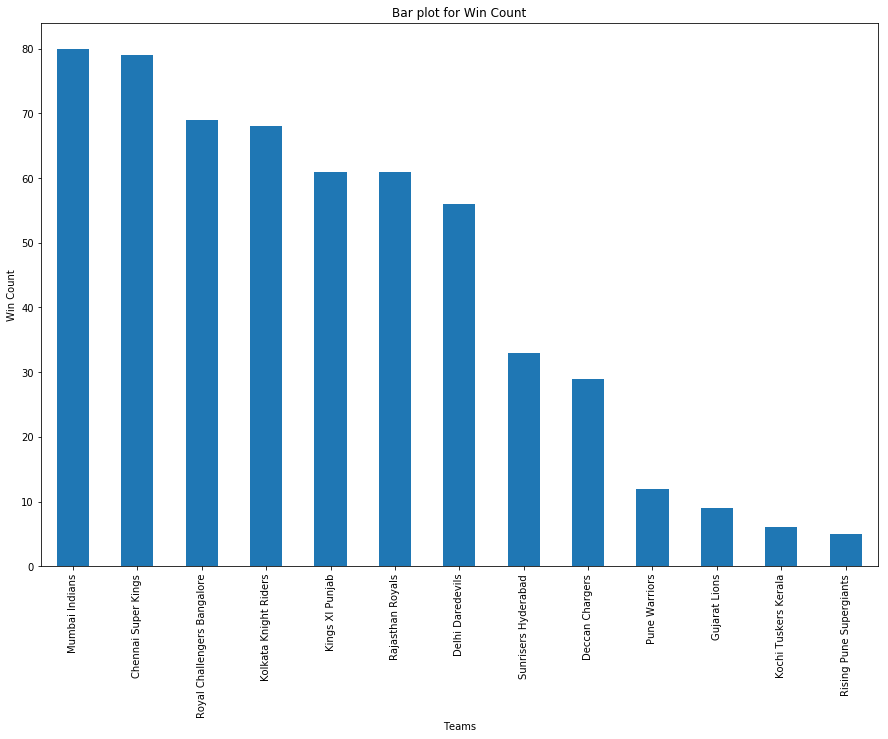

In [55]:
win = df[['match_code', 'winner']].drop_duplicates().groupby(['winner']).count()
win.sort_values('match_code', ascending=False).plot(kind='bar', figsize=[15,10])
plt.xlabel('Teams')
plt.ylabel('Win Count')
plt.title('Bar plot for Win Count')
plt.legend().remove()
plt.show()

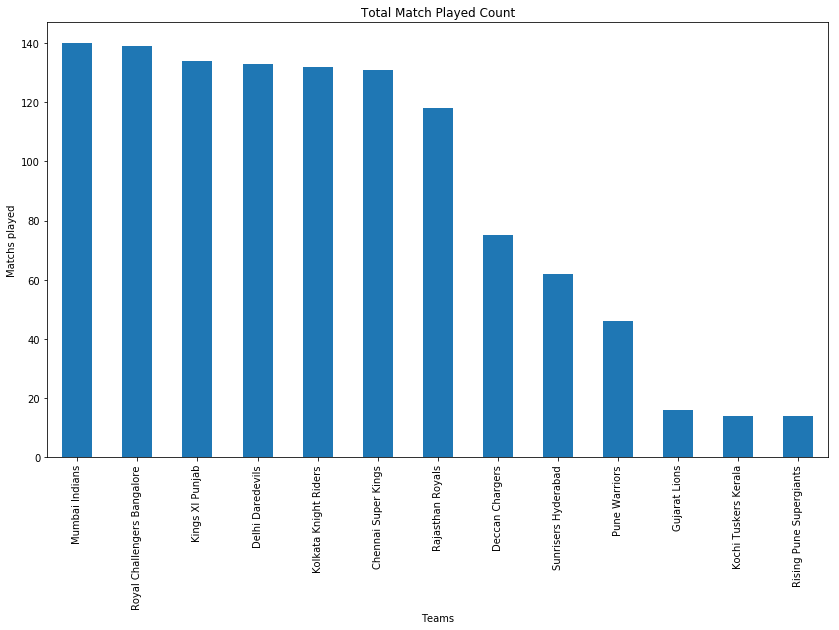

In [94]:
total_matches = df[['match_code', 'team1', 'team2']].drop_duplicates()
total_matches = pd.concat([total_matches['team1'], total_matches['team2']])
total_matches.value_counts().plot(kind='bar', figsize=[14,8])
plt.xlabel('Teams')
plt.ylabel('Matchs played')
plt.title('Total Match Played Count')
plt.show()

In [107]:
wicket = df[(df.player_out.notnull()) & (df.wicket_kind!='run_out')][['bowler']]
wicket['bowler'].value_counts()

SL Malinga          159
DJ Bravo            137
A Mishra            132
Harbhajan Singh     128
PP Chawla           127
R Vinay Kumar       123
A Nehra             111
R Ashwin            110
Z Khan              107
RP Singh            100
DW Steyn            100
PP Ojha              99
SP Narine            97
IK Pathan            97
P Kumar              96
JA Morkel            96
SR Watson            95
UT Yadav             89
B Kumar              89
M Morkel             88
L Balaji             85
RA Jadeja            84
MM Patel             81
AB Dinda             80
R Bhatia             80
DS Kulkarni          78
MM Sharma            78
JH Kallis            74
SK Trivedi           73
KA Pollard           67
                   ... 
PM Sarvesh Kumar      1
S Vidyut              1
MK Tiwary             1
JDS Neesham           1
A Nel                 1
B Laughlin            1
AC Gilchrist          1
D Salunkhe            1
AA Noffke             1
FY Fazal              1
TP Sudhindra    

In [128]:
venue_avg_score = df.groupby(['venue', 'match_code', 'inning'])['total'].sum()
venue_avg_score.reset_index(level=['match_code', 'inning'], drop=True, inplace=True)
venue_avg_score = venue_avg_score.reset_index()
venue_avg_score.groupby('venue').mean()

,total
venue,
Barabati Stadium,162.714286
Brabourne Stadium,174.590909
Buffalo Park,133.166667
De Beers Diamond Oval,149.500000
Dr DY Patil Sports Academy,141.470588
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,141.863636
Dubai International Cricket Stadium,147.428571
Eden Gardens,147.481481
Feroz Shah Kotla,152.800000


In [140]:
pd.options.display.max_rows = 20
pd.options.display.max_columns = None
df.head()

,match_code,date,city,venue,team1,team2,toss_winner,toss_decision,winner,win_type,win_margin,inning,delivery,batting_team,batsman,non_striker,bowler,runs,extras,total,extras_type,player_out,wicket_kind,wicket_fielders,year
0,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,9.0,1,0.1,Mumbai Indians,ST Jayasuriya,SR Tendulkar,I Sharma,0,1,1,wides,NaN,NaN,NaN,2009
1,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,9.0,1,0.2,Mumbai Indians,ST Jayasuriya,SR Tendulkar,I Sharma,1,0,1,NaN,NaN,NaN,NaN,2009
2,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,9.0,1,0.3,Mumbai Indians,SR Tendulkar,ST Jayasuriya,I Sharma,0,1,1,wides,NaN,NaN,NaN,2009
3,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,9.0,1,0.4,Mumbai Indians,SR Tendulkar,ST Jayasuriya,I Sharma,0,0,0,NaN,NaN,NaN,NaN,2009
4,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,9.0,1,0.5,Mumbai Indians,SR Tendulkar,ST Jayasuriya,I Sharma,2,0,2,NaN,NaN,NaN,NaN,2009


In [147]:
wicket_type = df[df.wicket_kind.notnull()][['wicket_kind']]
wicket_type['wicket_kind'].value_counts()

caught                   3950
bowled                   1248
run out                   693
lbw                       398
stumped                   222
caught and bowled         187
hit wicket                  8
retired hurt                8
obstructing the field       1
Name: wicket_kind, dtype: int64

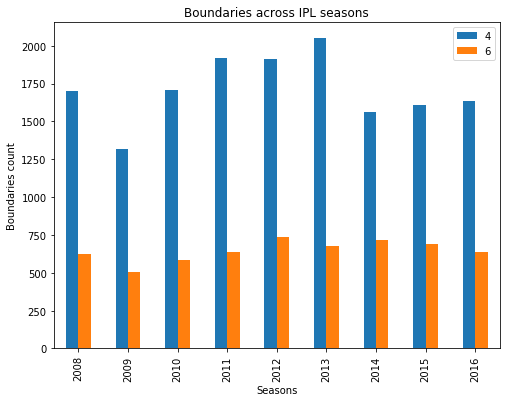

In [178]:
four = df[df.runs==4].groupby('year').size().reset_index().rename(columns={0:4})
six = df[df.runs==6].groupby('year').size().reset_index().rename(columns={0:6})
boundry = pd.merge(left=four, right=six, how='outer', on='year').set_index('year')
boundry.plot(kind='bar', figsize=[8,6])
plt.xlabel('Seasons')
plt.ylabel('Boundaries count')
plt.title('Boundaries across IPL seasons')
plt.show()

In [207]:
no_of_matches = df.groupby(['year'])['match_code'].nunique()
avg_runspermatch = df.groupby(['year', 'match_code'])['total'].sum()
avg_runspermatch.reset_index('match_code', drop=True, inplace=True)
avg_runspermatch = avg_runspermatch.reset_index()
avg_runspermatch = avg_runspermatch.groupby('year')['total'].mean()
avg_bowlspermatch = df.groupby(['year', 'match_code']).size()
avg_bowlspermatch.reset_index('match_code', drop=True, inplace=True)
avg_bowlspermatch = avg_bowlspermatch.reset_index()
avg_bowlspermatch = avg_bowlspermatch.groupby('year').mean()
avg_stats = pd.concat([no_of_matches, avg_runspermatch, avg_bowlspermatch], axis=1)
avg_stats.rename(columns={'match_code':'Match Count', 'total':'Avg Runs/Match', 0:'Avg Bowls/Match'}, inplace=True)
avg_stats['Avg Runs/Ball'] = avg_stats['Avg Runs/Match']/avg_stats['Avg Bowls/Match']
avg_stats

,Match Count,Avg Runs/Match,Avg Bowls/Match,Avg Runs/Ball
year,,,,
2008,58,309.241379,232.534483,1.329873
2009,57,286.315789,238.508772,1.200441
2010,60,314.366667,241.450000,1.301995
2011,73,289.780822,233.054795,1.243402
2012,74,303.391892,240.067568,1.263777
2013,76,296.592105,238.842105,1.241792
2014,60,315.150000,238.116667,1.323511
2015,59,310.694915,231.186441,1.343915
2016,60,314.366667,234.933333,1.338110
